<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Supervised Learning - AutoML H<sub>2</sub>O - DataSet
</b></font> </br></p> 

---


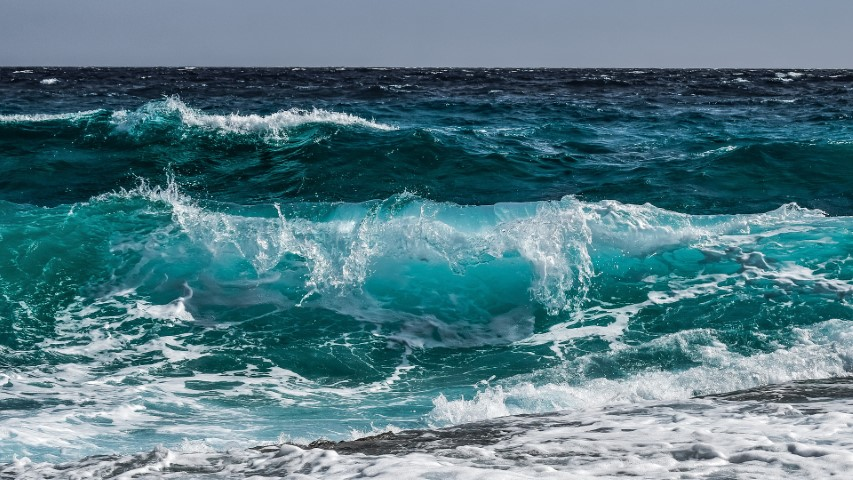

Bild von <a href="https://pixabay.com/de/users/dimitrisvetsikas1969-1857980/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3473335">Dimitris Vetsikas</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=3473335">Pixabay</a>

# **1  <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   

Erstellen Sie eine Jupyter Notebook mit einer `AutoML`. Sie können eines der bereits erstellten Jupyter Notebooks dazu nutzen oder komplett neu mit einem der folgenden DataSets aufbauen. Nutzen Sie die Bibliothek H<sub>2</sub>O.







+ car_crashes: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset   
+ diamonds: https://ggplot2.tidyverse.org/reference/diamonds.html   
+ dowjones: https://fred.stlouisfed.org/series/M1109BUSM293NNBR   
+ geyser: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html   
+ mpg: https://data.world/dataman-udit/cars-data   
+ penguins: https://github.com/allisonhorst/penguins   
+ seaice: https://nsidc.org/arcticseaicenews/sea-ice-tools/   
+ taxis: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page   
+ tips: https://rdrr.io/cran/reshape2/man/tips.html   
+ titanic: https://www.kaggle.com/c/titanic/data   

In [ ]:
import pandas as pd
import seaborn
df = seaborn.load_dataset("...")

In [ ]:
label = '...'
features = [n for n in df.columns if n != label]

In [ ]:
data = df[features]
target = df[label]

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.groupby('pclass').count()

In [ ]:
data[target].value_counts()

In [ ]:
_ = data.hist(figsize=(15,15))

# **2 <font color='orange'>|</font> Prepare**

---

 <p><font color='black' size="5">
 H<sub>2</sub>O AutoML
</font></p>

[Doku](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)   
[Tutorials](https://github.com/h2oai/h2o-tutorials)   

In [ ]:
%%capture
try:
  import h2o
  from h2o.automl import H2OAutoML  
except:
  !pip install -q h2o
  import h2o
  from h2o.automl import H2OAutoML  

 <p><font color='black' size="5">
 H<sub>2</sub>O Instanz erstellen
</font></p>


---   

Die Initialisierung einer H<sub>2</sub>O-Instanz (Java Virtual Machine).

In [ ]:
h2o.init(nthreads=-1)

<p><font color='black' size="5">
Konvertieren DataFrame in H<sub>2</sub>O Frame
</font></p>

In [ ]:
data_h2o = h2o.H2OFrame(data)
# data_h2o[target] = data_h2o[target].asfactor()

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [ ]:
data_train, data_test = data_h2o.split_frame(ratios=[0.8], seed = 1)

In [ ]:
data_train.describe()

<p><font color='black' size="5">
Modellerstellung & Training
</font></p>

In [ ]:
model = H2OAutoML(max_runtime_secs =10*60, balance_classes=True, sort_metric='RMSE', seed =42)

In [ ]:
%%time
model.train(training_frame = data_train, y = target)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Leaderboard
</font></p>


Das Leaderboard ist ein zentrales Objekt in H<sub>2</sub>O AutoML. Basierend auf der jeweiligen Aufgabe (Regression, binäre Klassifizierung, Mehrklassenklassifizierung) gibt das Leaderboard verschiedene Modellleistungsmetriken zurück. Weitere Informationen zu H2O-Modellmetriken finden Sie hier.

In [ ]:
lb = model.leaderboard
lb.head(rows=lb.nrows)

<p><font color='black' size="5">
Das beste Modell
</font></p>

In [ ]:
best_model = model.get_best_model()
print(best_model)

In [ ]:
best_model.model_performance(data_test)

<p><font color='black' size="5">
Modell
</font></p>


H<sub>2</sub>O Explainability Interface ist ein praktischer Wrapper für eine Reihe von Erklärbarkeitsmethoden und Visualisierungen in H<sub>2</sub>O. Die h2o.explain()Funktion generiert eine Liste von Erklärungen – einzelne Erklärungseinheiten, wie z. B. ein Diagramm der teilweisen Abhängigkeit oder ein Diagramm der variablen Wichtigkeit. 

In [ ]:
explain_model = model.explain(frame = data_test, figsize = (8,6))

In [ ]:
model.explain_row(frame = data_test, row_index = 15, figsize = (8,6))

In [ ]:
data_test[15,:]

# **5 <font color='orange'>|</font> Deploy**
---